In [1]:
# импортируем библиотеки

import pandas as pd 
import warnings
import seaborn as sns
from pymystem3 import Mystem


warnings.filterwarnings("ignore")
m = Mystem()

# 1. Обзор данных

In [2]:
# загрузим данные

try:
    data = pd.read_csv('link to the file')
except:
    data = pd.read_csv('link to the file')

In [3]:
# открываем таблицу data

print('Статистика о платёжеспособности клиентов:')
data.head()


Статистика о платёжеспособности клиентов:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
# получаем общую информацию о данных в таблице data 

print('Общая информация о таблице:')
print()
data.info()

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Согласно полученной информации, мы видим, что:

* в таблице **12 столбцов** и **21 525 строк**;

* есть **пропущенные значения** в столбцах `days_employed` и `total_income`, *причем количество пропущенных значений в этих столбцах совпадает*; 
* название столбцов не требуют изменений;
* в таблице представлены следующие типы данных:
  1. int64 - *целые числа;*
  2. float64 - *вещественные числа;*
  3. object - *строка или данные, которые не подходят ни под один другой тип.*

  
Названия столбцов согласно полученной документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.

### Выводы

В каждой строке таблицы - данные о клиенте. Часть колонок содержит информацию о семейном положении, образовании, занятости и ежемесячном доходе. В одной колонке представленна информация о наличии задолжености по возврату кредитов. Также есть колонка с целью получения кредита.

Предварительно можно утверждать, что данных достаточно для проведения исследования. Но встречаются пропуски в данных и есть одинаковые значение, которые записанны по-разному с использованием заглавных и строчных букв. Можно увидеть аномалии - отрицательные значений в столбце указывающего на трудовой стаж в днях. 

Чтобы двигаться дальше необходимо устранить пробелы в данных, привести одинаковые значени в единый формат и изучить аномалии.



# 2. Предобработка данных

* найдем все пропущенные значения и заполним их; 
* проверим данные на аномалии;
* одинаковые значение приведем к одному регистру;
* подготовим данные для проведения исследования.

### Шаг 2.1 Заполнение пропусков

Мы выяснили, что в данных есть пропущенные значения, а именно **2 174** в стобцах:
* `days_employed` - показывает общий трудовой стаж в днях клиента;
* `total_income` - показывает ежемесячный доход клиента.

Это примерно **1/10** данных, стоит обратить внимание, что на проведения исследования данные столбца `days_employed` не влияют, в отличии от данных столбца `total_income`.

Оба этих столбца отражают трудовую деятельность клиентов, можно предположить, что сами клиенты захотели скрыть данные по личным причинам. Но мы не можем исключать вариант, что пропуски появились не по вине клиентов.

Данные в этих столбцах являются количественными переменными, мы можем заполнить их медианой по каждому из столбцу. Но есть некоторые сомнения, что медиана не будет отражать действительность. Давайте узнаем их медианы.

In [5]:
# расчитаем медиану для каждого из столбца с пропусками

print('''Медиана общего трудового стажа равна: {0};
Медиана ежемесячного дохода равна: {1}
'''.format(data['days_employed'].median(), data['total_income'].median()))



Медиана общего трудового стажа равна: -1203.369528770489;
Медиана ежемесячного дохода равна: 145017.93753253992



<a id='median'></a>

Получили **отрицательную медиану** со стажем и зарплату в **145 017** рублей в месяц. 

Я несказано рад за наших соотечествеников :) , но доход в **145 017** рублей в месяц советую все таки проанализировать в дальнейшем, ведь проведение исследования будет зависить от этих данных.

**Давайте пока сконцентрируемся на столбце `days_employed`** - для проведения исследования, нам эти данные не потребуются, но хочется их привести к более или менее реалистичным показаниям. 

В этом столбце присутствуют отрицательные значения, а данные в этом столбце указывают общий трудовой стаж, поэтому эти данные могут равнятся нулю, если клиент нигде не работали или работал неофициально, но вот отрицательными быть не могут.

Отрицательные числа превратив в положительные и снова рассчитаем медиану столбца `days_employed`.

In [6]:
# при помощи функции abs() превратив отрицательные значения столбца 'days_employed' в положительные
# рассчитаем медиану уже с новыми значениями в столбце


data['days_employed'] = abs(data['days_employed'])
data['days_employed'].median()

2194.220566878695

**2 194** дня или примерно **6 лет** в трудовом стаже, уже больше похоже на правду.

Давайте заполним пропущеные значения в этих двув столбцах медианами по столбцам.

In [7]:
# заполним пропущенные значения медианами
# выведим общую информацию о таблице

data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
data['total_income'] = data['total_income'].fillna(data['total_income'].median())

print('Общая информация о таблице:')
print()
data.info() 


Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Для заполнения пропущенных значений в количественных переменных мы выбрали значения медианы, потому что медиана оценивает среднее значение, нивелировав влияние аномалий. Значения медиан кажутся сомнительными, но в следующим шаге мы будем проверять данные на аномалии и мы все перепроверим еще раз :)

### Шаг 2.2 Проверка данных на аномалии и исправления.

Выведим таблицу на экран и изучим ее на аномалии.


In [8]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Давайте пройдемся по порядку по каждому из столбцов:

#### Рассмотрим уникальные значения столбца `children` — количество детей в семье:

In [9]:
data['children'].sort_values().unique()

array([-1,  0,  1,  2,  3,  4,  5, 20], dtype=int64)

Что мы видим:
1. **-1** ребенок - предположим, что в семье 1 ребенок и минус поставили случайно;
2. **20 детей** в семье. Если учесть, что [самая многодетная семья в РФ в 2021 году](https://rg.ru/2021/07/17/reg-ufo/samuiu-mnogodetnuiu-mat-rossii-s-iubileem-pozdravili-144-naslednika.html) имеет 83 ребенка, то эти цифры не кажутся такими уж большими :)

Давайте взглянем на точечную диаграмму:

<AxesSubplot:xlabel='dob_years', ylabel='children'>

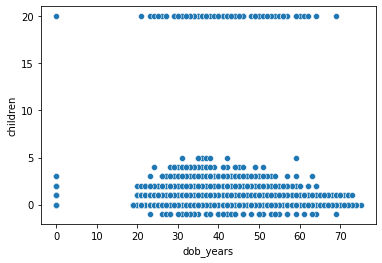

In [10]:
# выведим на экран точечную диаграмму по возрасту и количеству детей

sns.scatterplot(data=data, x='dob_years', y='children')

А еще говорят, что в России рождаемость упала :), вот до 30 лет и уже по 20 детей в семье. 

[Среднее количество детей в российской семье за 2017 год](https://aif.ru/society/people/v_cifrah_i_faktah_semeynye_pary_s_detmi_razvodyatsya_rezhe_bezdetnyh) - 1 ребенок.

Давайте и будем придерживаться этих данных и предположим, что семьи с 20 детьми - это на самом деле семьи с 2 детьми, а 0 поставили случайно.

Исправим все эти аномальные значения. И проверим выведя уникальные значения этого столбца.

In [11]:
# напишем функцию, которая убирает 0 там, где детей больше 10
# исправим отрицательное количество детей на положительное


def children(row):
    children = row['children']
    
    if children > 10:
        return children / 10
    return children
    
data['children'] = data.apply(children, axis=1)
data['children'] = abs(data['children'])
data['children'].sort_values().unique()

array([0., 1., 2., 3., 4., 5.])

#### Перейдем к столбцу `days_employed` — общий трудовой стаж в днях:

мы уже ранее заметили, что в данном столбце есть очень высокие показатели, например количество дней в трудовом стаже равное **340 266** это более **900** лет, либо в нашей стране придумали эликсир вечной жизни, а мы с вами ничего про это не знаем, и люди готовы работать по 900 лет :), либо эти данные указаны в другой величине, например часах или секундах. 

<a id='statistics'></a>

Для дальнейших расчетов мы будем опираться на [нормы рабочего времени в 2020 году](http://duma.gov.ru/news/47270/), которые равняются:



* **248** рабочих дней;
* **1 979** часов при 40-часовой неделе;
* соответственно получаем **118 740** минут. 


Давайте проверим эти догатки.


In [12]:


print('Возьмем как пример этого клиента:')

display(data.loc[4])


print('''
Проверим теорию о том, что данные указаны в часах. 
У нас получается: {0} год.
'''.format(340266 // 1979))

      
print('''Проверим теорию о том, что данные указаны в минутах. 
У нас получается: {0} года.
'''.format(340266 // 118740))




Возьмем как пример этого клиента:


children                         0.0
days_employed          340266.072047
dob_years                         53
education                    среднее
education_id                       1
family_status       гражданский брак
family_status_id                   1
gender                             F
income_type                пенсионер
debt                               0
total_income            158616.07787
purpose              сыграть свадьбу
Name: 4, dtype: object


Проверим теорию о том, что данные указаны в часах. 
У нас получается: 171 год.

Проверим теорию о том, что данные указаны в минутах. 
У нас получается: 2 года.



В минутах это **171** год - что слишком много, а если в секунда - это всего лишь **2** года, что подозрительно мало для возраста в 53 года.

Поскольу для дальнейшего исследования нам эти данные не важны, давайте аномальные значения заменим на [cредний трудовой стаж в РФ за 2013 год](https://ria.ru/20131119/977986173.html), который равен **34,5** годам. 


In [13]:
print('Среднее количество дней в трудовом стаже составляет {0}'.format(34.5 * 248))

Среднее количество дней в трудовом стаже составляет 8556.0


Мы получили среднее количество рабочих дней в трудовом стаже равное **8 556**, давайте все что больше этого значения будем считать за аномалии. И не стоит забывать, что стаж в днях напрямую зависит от возраста, ведь не может клиент в 20 летнем возрасте иметь стаж более 10 лет и т.д.

Для того, чтобы исправить аномальные значения в трудовос стаже нам потребуются данные в столбце `dob_years`, потому что мы будем соотносить возраст с количеством трудовых дней представленых [здесь](#statistics).

Выведим уникальные значения столбца `dob_years`:

In [14]:
# выведим уникальные значения столбца 'dob_years'

data['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

**Нулевой возраст**, давайте посмотрим подробнее на этих клиентов:

In [15]:
# выведим на экран клиентов имеющих нулевой возраст и уникальные значения столбца 'income_type'

display(data[data['dob_years'] == 0])

data[data['dob_years'] == 0]['income_type'].unique()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0.0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0.0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3.0,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0.0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0.0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0.0,2194.220567,0,среднее,1,женат / замужем,0,F,сотрудник,0,145017.937533,жилье
20462,0.0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0.0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2.0,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


array(['пенсионер', 'сотрудник', 'компаньон', 'госслужащий'], dtype=object)

**101** человек имеет нулевой возраст среди таких типов занятости, как: пенсионер, сотрудник, компаньон, госслужащий.
Предлагаю нулевой возраст заменить на медиану каждого из типов занятости, так на мой взгляд будет более правдоподобно и сразу будем исправлять стаж в трудовых днях, с учетом их совершенолетнего возраста.

In [16]:
# создадим переменные с медианами возрастов для каждого типа с нулевыми значениями
# напишем функцию, которая будет исправлять нулевой возраст в соответствии с типом занятости 
# выведим уникальные значения столбца 'dob_years' и проверим возраст


median_pensioners_dob = data[data['income_type'] == 'пенсионер']['dob_years'].median()
median_employee_dob = data[data['income_type'] == 'сотрудник']['dob_years'].median()
median_companion_dob = data[data['income_type'] == 'компаньон']['dob_years'].median()
median_state_employee_dob = data[data['income_type'] == 'госслужащий']['dob_years'].median()


def dob_years(row):
    dob_years = row['dob_years']           # возраст клиента
    income_type = row['income_type']       # тип занятости
    
    if dob_years == 0:
        if income_type == 'пенсионер':
            return  median_pensioners_dob
        elif income_type == 'сотрудник':
            return  median_employee_dob
        elif income_type == 'компаньон':
            return  median_companion_dob
        elif income_type == 'госслужащий':
            return  int(median_state_employee_dob)
    return int(dob_years)

data['dob_years'] = data.apply(dob_years, axis=1)

data['dob_years'].sort_values().unique()







array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75.])

<AxesSubplot:xlabel='days_employed', ylabel='dob_years'>

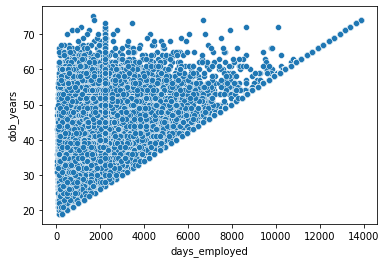

In [17]:
# напишем функцию, которая будет исправлять аномальные значения в стаже 
# с учетом совершенолетнего возраста (т.е. возраст минус 18 лет)
# проверим и выведим на экран точечную диаграмму по возрасту и стажу


def days_employed(row):
    days_employed = row['days_employed']                # стаж в днях
    dob_years = row['dob_years']                        # возраст клиента
    mean_days_employed = (dob_years - 18) * 248         # ср. труд. стаж в днях из расчета 248 раб. дней в году
    
    if days_employed > mean_days_employed:
        return mean_days_employed
    return days_employed

    

data['days_employed'] = data.apply(days_employed, axis=1)

sns.scatterplot(data=data, x='days_employed', y='dob_years')






Исправили значения в нулевом возрасте и значение в трудовос стаже из расчета [248 рабочих дней](#statistics) в году и официальный стаж начисляется с 18 летнего возраста. 

#### Перейдем к столбцу `education` — уровень образования клиента:

Выведим его уникальные значения на экран:


In [18]:
# проверим уникальные значения столбца 

data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к одному регистру.
    
    

In [19]:
# приведем все данные столбца 'education' к нижнему регистру и снова выведим уникальные значения

data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

#### Перейдем к столбцу `education_id` - идентификатор уровня образования.

Выведим его уникальные значения:

In [20]:
# проверим уникальные значения столбца 

data['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

ID образования, все понятно, но на всякий случай сгруппируем и посмотрим какое id присвоенно к какому образованию:

In [21]:
# сгруппируем данные столбца с образованием и столбца id-образования 

data.groupby('education')['education_id'].median().sort_values()

education
высшее                 0
среднее                1
неоконченное высшее    2
начальное              3
ученая степень         4
Name: education_id, dtype: int64

#### Перейдем к столбцу `family_status` — семейное положение и  столбцу `family_status_id` - идентификатор семейного положения.

Проверим на уникальные значения и какое ID к какому семейному положению относится:

In [22]:
# проверим уникальные значения столбцов

print('Уницальные значения столбца *family_status*')
print()
print(data['family_status'].unique())
print()
print('Уницальные значения столбца *family_status_id*')
print()
print(data['family_status_id'].unique())

Уницальные значения столбца *family_status*

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Уницальные значения столбца *family_status_id*

[0 1 2 3 4]


Видим в столбце `family_status` данные записаны по-разному: **с использованием заглавных и строчных букв**.

**Исправим** и приведем все данные к нижнему регистру **и сгруппируем эти столбцы**, чтобы понять какое ID у типа семейного положения:

In [23]:
# приведем данные столбца 'family_status' к нижнему регистру
# сгруппируем эти два столбца и узнаем ID


data['family_status'] = data['family_status'].str.lower()
data.groupby('family_status')['family_status_id'].median().sort_values()

family_status
женат / замужем          0
гражданский брак         1
вдовец / вдова           2
в разводе                3
не женат / не замужем    4
Name: family_status_id, dtype: int64

#### Перейдем к столбцу `gender` — пол клиента:

Выведим его уникальные значения на экран:

In [24]:
# уникальные значения столбца 

data['gender'].unique()


array(['F', 'M', 'XNA'], dtype=object)

**XNA** давайте рассмотрим подробнее этого клиента:


In [25]:
# выведим данные о клиентах у которых пол XNA

data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0.0,1488.0,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Впринципе, пол клиента нам для исследования не важен, и здесь **всего 1 случай**, поэтому мы исправим значение **XNA** на женский - **F**, просто потому что женщин на планете больше чем мужчин, вот как то так все просто :)

In [26]:
# исправим на женский пол
# еще раз проверим уникальные значения столбца

data.loc[10701, 'gender'] = 'F'
data['gender'].unique()

array(['F', 'M'], dtype=object)

#### Перейдем к столбцу `income_type` — тип занятости:

Проверим уникальные значения и соотношение к возрасту:

In [27]:
# уникальные значения столбца 


print(data['income_type'].unique())

data.groupby('income_type')['dob_years'].mean()

['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


income_type
безработный        38.000000
в декрете          39.000000
госслужащий        40.801234
компаньон          39.850934
пенсионер          59.374222
предприниматель    42.500000
сотрудник          40.013940
студент            22.000000
Name: dob_years, dtype: float64

#### Перейдем к столбцу `debt` — имел ли задолженность по возврату кредитов:

Мы видили ранее значение 1 или 2 в столбце, можно предположить, что эти **значения булева типа** хранят информацию об истинности утверждений. Таких значений всего два: **True - 1**, когда утверждение истинно, и **False - 0**, когда ложно.

Выведим уникальные значения столбца:

In [28]:
# уникальные значения столбца 

print(data['debt'].unique())

[0 1]


#### Перейдем к столбцу `total_income` — ежемесячный доход:

Ранее мы [выводили медиану](#median) по этому столбцу и получили значение в  **145 017**. Давайте взглянем на гистограмму.

<AxesSubplot:xlabel='total_income', ylabel='income_type'>

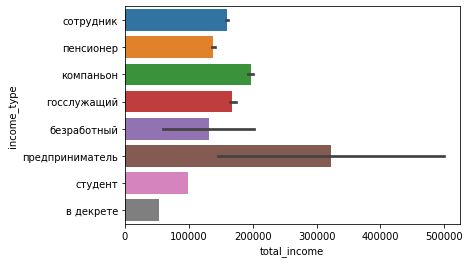

In [29]:
# выведем на экран гистограмму

sns.barplot(x=data['total_income'], y=data['income_type'])

Взглянув на гистограмму можно и правда предположить, что значения в ней правдивы, поскольку у нас нет достаточно данных это опровергнуть, мы будем работать с этими данными и порадуемся за наших соотечествеников, у них хорошие зарплаты, надеюсь так все и останется :) !!!

#### Перейдем к столбцу `purpose` —  цель получения кредита:

Выведем уникальные значения этого столбца, как я правильно понял эти данные заполняли сами клиенты вручную, поэтому одни и те же цели могут быть записаны по-разному

In [30]:
# уникальные значения столбца 

print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Да мы убедились, что одинаковые цели сформулированны по-разному, пока что оставим все как есть. Все данные указанны в нижнем регистре, работать с ними можно.

### Шаг 2.3. Изменение типов данных.

Мы заполнили пропущенные значения медианами по столбцам, выявили аномалии и исправили их, выявили ошибки в данных, привели все данные к общему для столбца регистру.

Давайте выведим таблицу на экран и изучим ее на предмет, какие типы данных нам изменить, для улучшения исследования.

В исследовании нам нужно проверить [4 гипотезы](#description), для этого нам нужны данные из следующих столбцов:

* `children` — количество детей в семье
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

In [31]:
# выведим общую таблицу на экран

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,5952.000000,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1.0,4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0.0,3720.000000,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3.0,3472.000000,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0.0,8680.000000,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Из тех столбцов, что нам необходимы для исследования, я предлагаю изменить тип данных в столбцах `children` и `total_income` на **целочисленный**, в дальнейшем с такими данными будет удобнее работать. Остальные уже данные приведены к общему регистру.

In [32]:
# Заменим вещественный тип данных в столбцах на целочисленный


data['children'] = data['children'].astype('int')
data['total_income'] = data['total_income'].astype('int')

### Шаг 2.4. Удаление дубликатов.

Проверим все данные на наличие явных дубликатов.

In [33]:
# проверим данные на дубликаты

data.duplicated().sum()

71

**71** дубликат, давайте их удалим, и перезапишем индексы.


In [34]:
# удалим дубликаты и перезапишем индексы
# снова проверим данные на дубликаты

data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Удалили явные дубликаты, но на всякий случай давайте проверим столбец с ежемесячным доходом.

In [35]:
# проанализируем столбец на наличие дубликатов

data['total_income'].value_counts()

145017    2104
139038       3
104693       3
172040       3
144163       3
          ... 
205761       1
179138       1
61724        1
99269        1
126820       1
Name: total_income, Length: 18606, dtype: int64

Видим, что преобладает значение **145 017**, но это [медиана по столбцу](#median), а вот другие повторяющиеся значения нам интересны, конечно уровень ежемесячного дохода может совпадать у разных клиентов, но если они одного пола, возраста, у них одинаковое количество детей и семейное положение, то это уже странно :) Давайте проверим: 

In [36]:
# создадим df повторяющихся значений и назовем его 'doublicated_age_income' с определенными столбцами
# удалим медиану
# проверим неявные дубликаты и выведим их число на экран

doublicated_age_income = data[['children','dob_years', 'family_status_id', 'gender','total_income']]
doublicated_age_income = doublicated_age_income[doublicated_age_income['total_income'] != 145017]


doublicated_age_income.duplicated().sum()

2

Мы получили **2** неявных дубликатов, это странно.

Давайте получше на них взглянем:

In [37]:
# выведим на экран строки дубликатов 

doublicated_age_income.loc[doublicated_age_income.duplicated()]

,children,dob_years,family_status_id,gender,total_income
7837,0,53.0,0,F,218674
18651,0,55.0,0,F,100524


Согласитесь странно, когда все выше перечислинные критерии совпадают. Выведим данные о них из основной таблицы:


In [38]:
print('Данные из основной таблицы о первом дубликате:')
print()
display(data[data['children'] == 0]
        [data['dob_years'] == 53]
        [data['family_status_id'] == 0]
        [data['gender'] == 'F']
        [data['total_income'] == 218674])
print()
print('Данные из основной таблицы о втором дубликате:')
print()
display(data[data['children'] == 0]
        [data['dob_years'] == 55]
        [data['family_status_id'] == 0]
        [data['gender'] == 'F']
        [data['total_income'] == 100524])

Данные из основной таблицы о первом дубликате:



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6272,0,8680.0,53.0,среднее,1,женат / замужем,0,F,госслужащий,0,218674,сделка с автомобилем
7837,0,8680.0,53.0,высшее,0,женат / замужем,0,F,компаньон,0,218674,образование



Данные из основной таблицы о втором дубликате:



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
13890,0,9176.0,55.0,среднее,1,женат / замужем,0,F,пенсионер,0,100524,на покупку автомобиля
18651,0,9176.0,55.0,среднее,1,женат / замужем,0,F,компаньон,0,100524,сделка с автомобилем


Давайте изучим эти дубликаты:

* **Первый дубликат**:
** женщины одного возраста, со средним образованием и обе замужем - здесь нет ничего подозрительного;
** детей у обоих нет, тоже нормальное значение, к сожалению( ;
** одинаковый трудовой стаж - мы же его приводили к приблизительным показателям по годам, поэтому и совпадение;
** разный тип занятости и разные цели кредита.

**Вывод**: предположим, что это два разных человека, разный тип занятости и цели кредита подталкивают нас к этому решению.

* **Второй дубликат**:
** показатели схожи с первым случаем, но смущает одинаковая, но по-разному сформулированная цель кредита и хоть и разный, но тип занятости.
** чисто теоретически пенсионер может быть и компаньоном, почему - нет!? 

**Вывод** предположим, что это один и тот же человек, потому что имеет одинаковую цель приобретения кредита, и впринцепе являясь пенсионером, может быть и компаньоном.положим, что это один и тот же человек, потому что имеет одинаковую цель приобретения кредита, и впринцепе являясь пенсионером, может быть и компаньоном.

**Итог**: **удалим** из основной таблицы **второй дубликат**, предположив, что это один и тот же человек, на результаты исследование удаление одной строки из таблицы это не повлияет.

In [39]:
# удалим по индексу второй дубликат

data = data.drop(index=[18651])



In [40]:
# выведем информацию о втором дубликате, чтобы проверить себя :)

print()
print('Данные из основной таблицы о втором дубликате:')
print()
display(data[data['children'] == 0]
        [data['dob_years'] == 55]
        [data['family_status_id'] == 0]
        [data['gender'] == 'F']
        [data['total_income'] == 100524])


Данные из основной таблицы о втором дубликате:



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
13890,0,9176.0,55.0,среднее,1,женат / замужем,0,F,пенсионер,0,100524,на покупку автомобиля


Мы удалили все явные дубликаты в таблице, проверили значения на неявные дубликаты и выявили 2. Изучив неявные дубликаты, мы удалили один, который показался нам сомнительным. Теперь данные не содержат дубликатов, можем переходить к следующему шагу.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что не забыл про дубликаты.
</div>

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

В датафрейме есть **4** столбца, в которых указаны значения и их ID, для исследования, мы создадим два новых датафрейма со столбцами:
* `education_id` и `education` — в первом;
* `family_status_id` и `family_status` — во втором.

Затем удалим из исходного датафрейма столбцы `education` и `family_status`, оставив только их идентификаторы: `education_id` и `family_status_id`.

Это упростит в дальнейшем исследование.

In [41]:
# создадим два новых датафрейма: 'education' и 'family_status'( в первом будут данные об образовании, 
# во втором данные о семейном положении)


education = data[['education_id', 'education']]
family_status = data[['family_status_id', 'family_status']]

Давайте на всякий случай подготовим документацию к этим датафреймам.

**education**:
* **Название столбцов**:
** `education_id` - идентификатор уровня образования;
** `education` — уровень образования клиента.
* **Значения в столбцах**:
** 0 - высшее;
** 1 - среднее;
** 2 - неоконченное высшее;
** 3 - начальное;
** 4 - ученая степень.


**family_status**:
* **Название столбцов**:
** `family_status_id` - идентификатор семейного положения;
** `family_status` - семейное положение.
* **Значения в столбцах**:
** 0 - женат / замужем;
** 1 - гражданский брак; 
** 2 - вдовец / вдова;
** 3 - в разводе;
** 4 - не женат / не замужем.


Удалим из исходного датафрейма столбцы `education` и `family_status`, оставив только их идентификаторы: `education_id` и `family_status_id`.







In [42]:
# удалим из датафрейма столбец с образованием и столбец с семейным положением

data = data.drop(['education', 'family_status'], axis=1)

### Шаг 2.6. Категоризация дохода.

Создадим новый столбец `total_income_category`, в котором сделаем категоризацию дохода по следующим условиям:

* доходу в диапазоне **0 – 30 000** — присвоим категорию **E**;
* доходу в диапазоне **30 001 – 50 000** — присвоим категорию **D**;
* доходу в диапазоне **50 001 – 200 000** — присвоим категорию **C**;
* доходу в диапазоне **200 001 – 1 000 000** — присвоим категорию **B**;
* доходу в диапазоне **1 000 001 и выше** — присвоим категорию **A**.

In [43]:
# напишем функци income_category которая добавит новый столбец в датафрейм и категоризирует доход по указанным выше условиям
# выведим обновленный датафрейм на экран и проверим
# выведим уникальные значения столбца 'total_income_category' и проверим данные


def income_category(row):
    total_income = row['total_income']
    
    if 0 <= total_income <= 30000:
        return 'E'
    elif 30001 <= total_income <= 50000:
        return 'D'
    elif 50001 <= total_income <= 200000:
        return 'C'
    elif 200001 <= total_income <= 1000000:
        return 'B'
    elif total_income >= 1000001:
        return 'A'
    return 'error'

data['total_income_category'] = data.apply(income_category, axis=1)
display(data)
data['total_income_category'].sort_values().unique()

    
    
    
    

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,5952.000000,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,3720.000000,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,3472.000000,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,8680.000000,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем,B
21450,0,12152.000000,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем,C
21451,1,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость,C
21452,3,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


array(['A', 'B', 'C', 'D', 'E'], dtype=object)

Мы успешно добавили новый столбец `total_income_category` с категорией дохода, на всякий случай проверили его уникальные значения на ошибки, ничего не обнаружили, теперь можем переходить к следующему шагу.





### Шаг 2.7. Категоризация целей кредита.

Еще ранее, при поиске дубликатов, мы обратили внимание на то, что **цели кредита записаны в произвольной форме**, поэтому одни и те же цели могут быть **сформулированы по-разному**, так работать с данными неудобно, поэтому и здесь мы применим категоризацию данных, как и ранее, но уже для столбца `purpose`.

Здесь дела обстоят посложне, чтобы нам сделать категоризацию столбца `purpose`, нам потребуется узнать начальную, словарную форму слова, и отталкиваясь от этих форм при категоризации.




In [44]:
# создадим word_purpose с уникальными значениями столбца data['purpose']
# создадим список lemma_purpose со словами из word_purpose приведенными к лемме
# выведем на экран lemma_purpose, чтобы вручную выделить самые частые существительные


word_purpose = data['purpose']
word_purpose = word_purpose.unique()
word_purpose
lemma_purpose = ', '.join(word_purpose)
lemma_purpose = m.lemmatize(lemma_purpose)
lemma_purpose

['покупка',
 ' ',
 'жилье',
 ', ',
 'приобретение',
 ' ',
 'автомобиль',
 ', ',
 'дополнительный',
 ' ',
 'образование',
 ', ',
 'сыграть',
 ' ',
 'свадьба',
 ', ',
 'операция',
 ' ',
 'с',
 ' ',
 'жилье',
 ', ',
 'образование',
 ', ',
 'на',
 ' ',
 'проведение',
 ' ',
 'свадьба',
 ', ',
 'покупка',
 ' ',
 'жилье',
 ' ',
 'для',
 ' ',
 'семья',
 ', ',
 'покупка',
 ' ',
 'недвижимость',
 ', ',
 'покупка',
 ' ',
 'коммерческий',
 ' ',
 'недвижимость',
 ', ',
 'покупка',
 ' ',
 'жилой',
 ' ',
 'недвижимость',
 ', ',
 'строительство',
 ' ',
 'собственный',
 ' ',
 'недвижимость',
 ', ',
 'недвижимость',
 ', ',
 'строительство',
 ' ',
 'недвижимость',
 ', ',
 'на',
 ' ',
 'покупка',
 ' ',
 'подержать',
 ' ',
 'автомобиль',
 ', ',
 'на',
 ' ',
 'покупка',
 ' ',
 'свой',
 ' ',
 'автомобиль',
 ', ',
 'операция',
 ' ',
 'с',
 ' ',
 'коммерческий',
 ' ',
 'недвижимость',
 ', ',
 'строительство',
 ' ',
 'жилой',
 ' ',
 'недвижимость',
 ', ',
 'жилье',
 ', ',
 'операция',
 ' ',
 'со',
 ' ',
 'свой'

Мы получили список уникальных значений столбца `purpose` приведенных к лемме, теперь давайте выделим (вручную) из этого списка самые частые существительные, именно они и будут основой категоризации.

#### У нас получились следующие категории:

1. `'операции с автомобилем'`     - основой будет **автомобил**;
2. `'операции с недвижимостью'`   - основой будут **жиль** и **недвижимост**;
3. `'проведение свадьбы'`         - основой будет **свадьб**;
4. `'получение образования'`      - основой будет **образовани**.


Теперь давайте добавим новый столбец `purpose_category` в котором все цели будут разделены на 4 категории.


In [45]:
# напишем функцию 'purpose_category' которая добавит в датафрейм новый столбец, где у всех целей будет всего 4 категории,
# эта функция пробежится по столбцу 'purpose' и присвоит каждому значению свою категорию
# применим функцию к датафрейму и создадим новый столбец 'purpose_category'
# выведим на экран датафрейм и проверим новый столбец 'purpose_category'
# выведим на экран уникальные значения нового столбца 'purpose_category'

def purpose_category(row):
    purpose = row['purpose']
    
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose or 'недвижимост' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образовани' in purpose:
        return 'получение образования'
    return 'категория не определена!'

data['purpose_category'] = data.apply(purpose_category, axis=1)

print('Выведим датафрейд на экран:')
display(data)
print()
print('Выведим уникальные значения столбца <purpose_category>')
data['purpose_category'].unique()




Выведим датафрейд на экран:


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,5952.000000,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,3720.000000,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,3472.000000,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,8680.000000,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21450,0,12152.000000,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21451,1,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21452,3,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем



Выведим уникальные значения столбца <purpose_category>


array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

### Вывод:

Мы сделали, следующее:
1. исправили пропущенные значения в данных на медианы по столбцам;
2. привели все данные к общему регистру в столбцах;
3. проверили данные на аномалии и исправили их;
4. удалили лишние для исследования столбцы из основного датафрейма.
5. создали два "словаря" из удаленных столбцах, в которых каждое значение привязано к своему ID-номеру;
6. сделали категоризацию необходимых для исследования данных.

Теперь мы можем приступать непосредственно к самому исследованию и ответить на следующие **вопросы**:

* есть ли **зависимость между количеством детей и возвратом кредита** в срок?
* есть ли **зависимость между семейным положением и возвратом кредита** в срок?
* есть ли **зависимость между уровнем дохода и возвратом кредита** в срок?
* как разные **цели кредита влияют на его возврат** в срок?

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Давайте проверим и выведим на экран сводную таблицу.

In [46]:
# выведим на экран сводную таблицу, где будет группировка количества детей и значения столбца 'debt'

data.pivot_table(index='children',values='debt', aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,debt,debt,debt
children,,,
0,1063,14090,0.075444
1,445,4855,0.091658
2,202,2128,0.094925
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


##### Вывод 1:

Изучив сводную таблицу, мы видим:
1. все семьи с **5** детьми - возвращают кредиты в срок;
2. семьи с **4** детьми - хуже всех возвращают кредиты в срок;
3. отсортируем по уровню возвращения кредита в срок, где начало - лучше всех отдают кредиты, а конец - хуже всех:
* семьи с **5** детьми;
* семьи без детей;
* семьи с **3** детьми;
* семьи с **1** ребенком;
* семьи с **2** детьми.
* семьи с **4** детьми.
4. примерно **7,5%** семей без детей - не возвращают кредиты в срок;
5. примерно **9%** семей с **1** ребенком - не возвращают кредиты в срок;
6. примерно **9,5%** семей с **2** детьми - не возвращают кредиты в срок;
7. примерно **8%** семей с **3** детьми - не возвращают кредиты в срок;
8. примерно **9,75%** семей с **4** детьми - не возвращают кредиты в срок. 

**Есть зависимость между количеством детей и возвратом кредита в срок, но она в диапазоне примерно 2%.**


##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Давайте проверим и выведим на экран сводную таблицу.

In [47]:
# выведим на экран сводную таблицу, где будет группировка по семейному положению и значения столбца 'debt

data.pivot_table(index='family_status_id', values='debt', aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,debt,debt,debt
family_status_id,,,
0,931,12338,0.075458
1,388,4151,0.093471
2,63,959,0.065693
3,85,1195,0.071130
4,274,2810,0.097509


**Значения в `family_status_id`**:
* 0 - женат / замужем;
* 1 - гражданский брак; 
* 2 - вдовец / вдова;
* 3 - в разводе;
* 4 - не женат / не замужем.

##### Вывод 2:

Изучив сводную таблицу, мы видим:
1. **вдовец / вдова** - **лучше всех** возвращают кредиты в срок;
2. **не женат / не замужем** - **хуже всех** возвращают кредиты в срок;
3. отсортируем по уровню возвращения кредита в срок, где начало - лучше всех отдают кредиты, а конец - хуже всех:
* вдовец / вдова;
* в разводе;
* женат / замужем;
* гражданский брак; 
* не женат / не замужем.
4. примерно **7,5%** со статусом **'женат / замужем'** не отдают кредиты в срок;
5. примерно **9,3%** со статусом **'гражданский брак'** не отдают кредиты в срок;
6. примерно **6,5%** со статусом **'вдовец / вдова'** не отдают кредиты в срок;
7. примерно **7%** со статусом **'в разводе'** не отдают кредиты в срок;
8. примерно **9,75%** со статусом **'не женат / не замужем'** не отдают кредиты в срок.

**Есть зависимость между семейным положением и возвратом кредита в срок, но она в диапазоне примерно 3%.**

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Давайте проверим и выведим на экран сводную таблицу.


In [48]:
# выведим на экран сводную таблицу, где будет группировка по уровню дохода и значения столбца 'debt

data.pivot_table(index='total_income_category', values='debt', aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,debt,debt,debt
total_income_category,,,
A,2,25,0.080000
B,356,5041,0.070621
C,1360,16015,0.084920
D,21,350,0.060000
E,2,22,0.090909


**Значения в `total_income_category`**:
* доходу в диапазоне **0 – 30 000** — присвоим категорию **E**;
* доходу в диапазоне **30 001 – 50 000** — присвоим категорию **D**;
* доходу в диапазоне **50 001 – 200 000** — присвоим категорию **C**;
* доходу в диапазоне **200 001 – 1 000 000** — присвоим категорию **B**;
* доходу в диапазоне **1 000 001 и выше** — присвоим категорию **A**.

##### Вывод 3:

Изучив сводную таблицу, мы видим:
1. **лучше всех** отдают кредиты граждане с категорией дохода - **D**;
2. **хуже всех** отдают кредиты граждане с категорией дохода - **E**;
3. отсортируем по уровню возвращения кредита в срок, где начало - лучше всех отдают кредиты, а конец - хуже всех:
* категория **D** и с доходом в диапазоне **30 001 – 50 000**;
* категория **B** и с доходом в диапазоне **200 001 – 1 000 000**;
* категория **A** и с доходом в диапазоне **1 000 001 и выше**;
* категория **C** и с доходом в диапазоне **50 001 – 200 000**;
* категория **E** и с доходом в диапазоне **0 – 30 000**;
4. примерно **8%** клиентов с категорией дохода **A** не отдают кредиты в срок;
5. примерно **7%** клиентов с категорией дохода **B** не отдают кредиты в срок;
6. примерно **8,5%** клиентов с категорией дохода **C** не отдают кредиты в срок;
7. примерно **6%** клиентов с категорией дохода **D** не отдают кредиты в срок;
8. примерно **9%** клиентов с категорией дохода **E** не отдают кредиты в срок.

**Есть зависимость между категорией дохода и возвратом кредита в срок, но она в диапазоне примерно 4%.**

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?
Давайте проверим и выведим на экран сводную таблицу.

In [49]:
# выведим на экран сводную таблицу, где будет группировка по целям кредита и значения столбца 'debt

data.pivot_table(index='purpose_category', values='debt', aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,403,4305,0.093612
операции с недвижимостью,782,10811,0.072334
получение образования,370,4013,0.092200
проведение свадьбы,186,2324,0.080034


##### Вывод 4:

Изучив сводную таблицу, мы видим:
1. кредиты с целью **'операции с недвижимостью'** выплачиваются **лучше всех**;
2. кредиты с целью **'операции с автомобилем'** выплачиваются **хуже всех**;
3. отсортируем по уровню возвращения кредита в срок, где начало - лучше всех отдают кредиты, а конец - хуже всех:
* 'операции с недвижимостью'
* 'проведение свадьбы'
* 'получение образования'
* 'операции с автомобилем'
4. примерно **9,3%** клиентов бравшие кредит с целью **операции с автомобилем** не отдают кредиты в срок;
5. примерно **7,2%** клиентов бравшие кредит с целью **операции с недвижимостью** не отдают кредиты в срок;
6. примерно **9,2%** клиентов бравшие кредит с целью **получение образования** не отдают кредиты в срок;
7. примерно **8%** клиентов бравшие кредит с целью **проведение свадьбы** не отдают кредиты в срок.

**Разные цели кредита влияют на его возврат в срок, но в диапазоне всего 2%**


## Общий вывод:

Изучив примерно **21 000** данных по клиентам, и проверив 4 гипотезы, мы можем заключиться следующие выводы:

Лучше всех кредиты отдают следующие категории граждан:
1. Семьи без детей или с пятью детьми;
2. У которых семейное положение - 'вдовец / вдова';
3. Ежемесячный доход у которых в диапазоне 30 001 – 50 000 рублей;
4. И бравшие кредит на 'операции с недвижимостью'

Что касается проверки гипотез, взаимосвязь присутствует, но не прямая.

**Исследование окончено!**
